# Supervised classification

## Setup
### Imports

In [1]:
import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
import time                                             # for execution time measurement
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.datasets import load_breast_cancer
from sklearn import metrics

### Loading the dataset

Today's dataset is the [Breast cancer Wisconsin dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset).

In [2]:
breast_cancer_dataset = load_breast_cancer()
df = pd.DataFrame(np.c_[breast_cancer_dataset['data'], breast_cancer_dataset['target']],
                  columns= np.append(breast_cancer_dataset['feature_names'], ['target']))
# je charge mon tableau numpy puis conversion en df en prenant les colonnes et concaténation

## Observing the dataset

Using what you have learned in the previous lessons, examine the dataset and see what you can learn about it. In the cells underneath, write any information that seems relevant to you. Focus in particular on the understanding of what the dataset and its columns contain.

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df['target'].value_counts()

1.0 357
0.0 212
Name: target, dtype: int64

In [ ]:
#len(df) = nbre de lignes
len(df)

569

<Axes: >

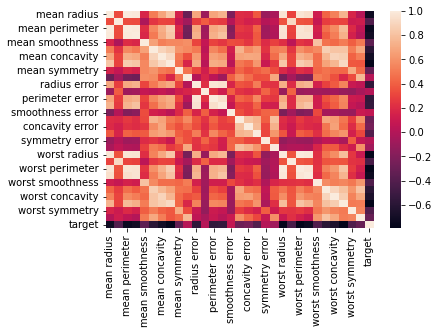

In [ ]:
sns.heatmap(df.corr())

<Axes: xlabel='target', ylabel='count'>

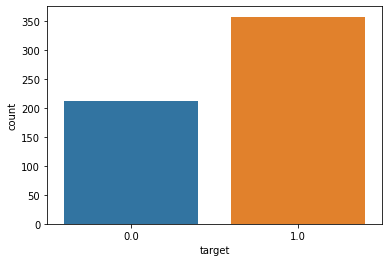

In [ ]:
sns.countplot(x= df.target, data =df)

*[Your comments here]*
- présence de quelques outliers et des zéro dans certaines colonnes
- pas de données dupliquées, ni de données manquantes
- 569 lignes et 32 colonnes (31)
- données en float
- dernière colonne target avec valeur 0 ou 1
- objectif = prédire si oui ou nn les gens ont un cancer du sein
- on a 357 patients avec valeur 0 et 212 avec valeur 1 (1: non malade et 0: malade) -> données déséquilibrés mais pour l'instant on change pas et on va voir si les premiers résultats sont satisfaisants ou non, si non, alors on améliorera
- avec heatmap, on voit forte corrélation

## Preparing the data

1. Define the input (X) and output (y) of the regression.
2. Using `scikit-learn`'s `train_test_split` function, separate X and y into training and test sets. Make it so that 80% of the data is used for training, and 20% for testing. 

In [ ]:
X=df.drop('target', axis=1) #on peut aussi écrire axis="columns"
y=df['target'] # pareil que df.target -> on accède à la colonne

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #randomstate=42

In [ ]:
X_train.shape

(455, 30)

## Performing classification

Consider the following algorithms: Logistic Regression, Linear Discriminant Analysis, Quadratic Discriminant Analysis (+ **bonus**: SVM). For each of these algorithms, answer the following questions:
1. What kind of decision boundary is this algorithm able to learn?
2. Find and import the sklearn implementation of the algorithm.
3. Fit the model to your data.
4. Create a `y_pred` variable containing the result of the prediction of the model on the test set.
5. **[Bonus]** Using `sklearn`'s documentation and other sources you find relevant, explain the general principle of the algorithm.


Logistic Regression :

1) La régression logistique est capable de génèrer des frontières de décisions linéaire ; c'est un algo de classification
   
5) Le principe général de la régression logistique est de modéliser la probabilité d'un résultat binaire à l'aide de la fonction logistique, qui mappe toute entrée en une valeur comprise entre 0 et 1. 


Linear Discriminant Analysis : 

1) l'analyse discriminante linéaire apprend les frontières de décision linéaires et est utilisée pour la réduction et la classification de la dimensionnalité.
5) LDA vise à trouver des combinaisons linéaires de caractéristiques qui séparent au mieux les classes de manière à minimiser la variance au sein de chaque classe et à maximiser la variance entre les classes (intra/inter classes)


Quadratic Discriminant Analysis :

1) analyse discriminante quadratique peut apprendre des frontières de décision plus complexes et non linéaires par rapport à la LDA 
5) QDA est similaire à LDA mais assouplit l'hypothèse de matrices de covariance égales pour chaque classe.


SVM : 
1) SVM génère différents types de frontières de décision linéaires et non linéaires.
2) les SVM trouvent un hyperplan qui sépare au mieux les points de données dans un espace de grande dimension

-> df simple donc résultats correctes 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# on crée une instance de régression logistic
logistic_reg = LogisticRegression(max_iter =5000) #entre parenthèse c'est la limitation d'itérations

# on fit ce modèle à notre train
logistic_reg.fit(X_train, y_train)

# on applique la prédiction à notre test
y_pred = logistic_reg.predict(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# Create an instance of the Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()

# Fit the model to your data
lda_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lda = lda_model.predict(X_test)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
# Create an instance of the Quadratic Discriminant Analysis model
qda_model = QuadraticDiscriminantAnalysis()

# Fit the model to your data
qda_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_qda = qda_model.predict(X_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Create an instance of the Support Vector Machine model
svm_model = SVC(kernel='linear')  # You can change the kernel for different boundary shapes

# Fit the model to your data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

## Evaluating the model

Answer the following questions for each of the models created above:

1. Compute the accuracy of the model.
2. Display the confusion matrix.
3. Compute the precision, recall and f1-score.
4. Comment on your results and compare with the other algorithms.
5. **[Bonus]** In your own words, explain what cross-validation is. Compute the score of your algorithms again using cross-validation. What differences, if any, do you observe? How do you interpret them?

In [ ]:
def compute_accuracy(confusion_matrix):
    return confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])

In [ ]:
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score,classification_report

In [ ]:
lr_accuracy_score=accuracy_score(y_test,y_pred)
print(lr_accuracy_score)

#en fct de l'objectif qu'on nous as donné, on peut s'arrêter là, c'est une bonne précision déjà

0.956140350877193


In [ ]:
classification_report(y_test,y_pred) #normalement donne résultat de tte les métriques qu'on a en haut

'              precision    recall  f1-score   support\n\n         0.0       0.92      0.98      0.95        47\n         1.0       0.98      0.94      0.96        67\n\n    accuracy                           0.96       114\n   macro avg       0.95      0.96      0.96       114\nweighted avg       0.96      0.96      0.96       114\n'

In [ ]:
f1_score(y_test,y_pred)

0.9618320610687023

In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy for each model
accuracy_logistic = accuracy_score(y_test, y_pred)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Accuracy (Logistic Regression): {accuracy_logistic:.2f}")
print(f"Accuracy (Linear Discriminant Analysis): {accuracy_lda:.2f}")
print(f"Accuracy (Quadratic Discriminant Analysis): {accuracy_qda:.2f}")
print(f"Accuracy (Support Vector Machine): {accuracy_svm:.2f}")

Accuracy (Logistic Regression): 0.96
Accuracy (Linear Discriminant Analysis): 0.96
Accuracy (Quadratic Discriminant Analysis): 0.95
Accuracy (Support Vector Machine): 0.95


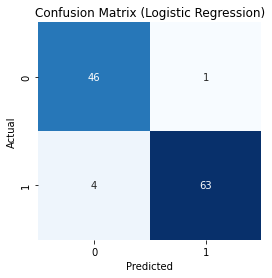

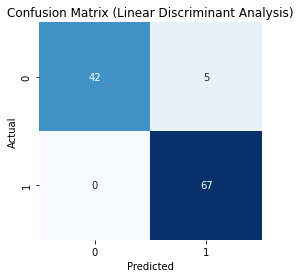

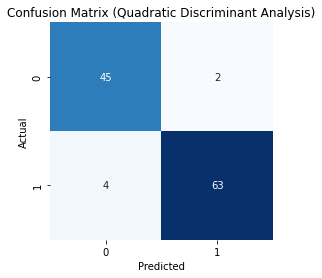

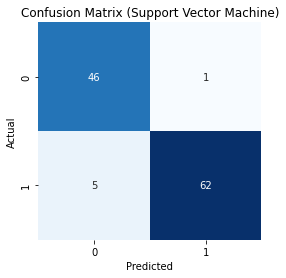

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Display confusion matrices for each model
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix (Logistic Regression)")
plot_confusion_matrix(y_test, y_pred_lda, "Confusion Matrix (Linear Discriminant Analysis)")
plot_confusion_matrix(y_test, y_pred_qda, "Confusion Matrix (Quadratic Discriminant Analysis)")
plot_confusion_matrix(y_test, y_pred_svm, "Confusion Matrix (Support Vector Machine)")

In [ ]:
from sklearn.metrics import classification_report

# Compute precision, recall, and F1-score for each model
report_logistic = classification_report(y_test, y_pred)
report_lda = classification_report(y_test, y_pred_lda)
report_qda = classification_report(y_test, y_pred_qda)
report_svm = classification_report(y_test, y_pred_svm)

print("Precision, Recall, and F1-Score (Logistic Regression):\n", report_logistic)
print("Precision, Recall, and F1-Score (Linear Discriminant Analysis):\n", report_lda)
print("Precision, Recall, and F1-Score (Quadratic Discriminant Analysis):\n", report_qda)
print("Precision, Recall, and F1-Score (Support Vector Machine):\n", report_svm)

Precision, Recall, and F1-Score (Logistic Regression):
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        47
         1.0       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Precision, Recall, and F1-Score (Linear Discriminant Analysis):
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        47
         1.0       0.93      1.00      0.96        67

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Precision, Recall, and F1-Score (Quadratic Discriminant Analysis):
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        47
         1.0       0.97      0.94      0.95     

## Bonus questions
1. Do you think balancing the dataset would increase the algorithms' performance? Try using a balancing method on the dataset and check your hypothesis.
2. Perform the same study on the dataset from the dimensionality reduction practical (handwritten 5's and 6's)